# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv("/content/Churn.csv")

In [3]:
df.shape

(7043, 21)

In [4]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Analysis

In [5]:
df.drop(["customerID"], inplace = True, axis = 1)

In [6]:
def stacked_plot(df, group, target):
    fig, ax = plt.subplots(figsize = (6,4))
    temp_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
    temp_df.plot(kind='bar', stacked=True, ax = ax, color = ["green", "darkred"])
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel(group)
    ax.set_ylabel('Churn Percentage')

### Gender, SeniorCitizen, Partner, Dependents

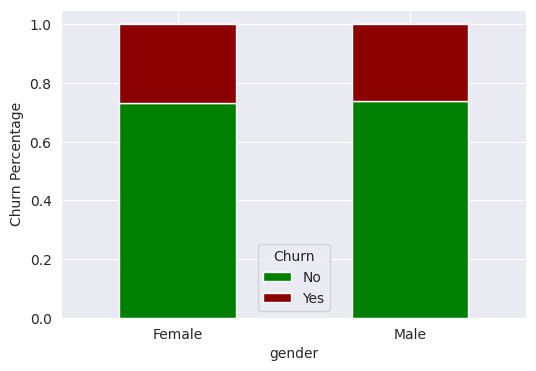

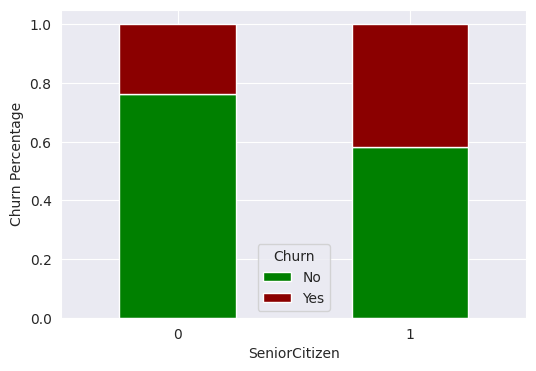

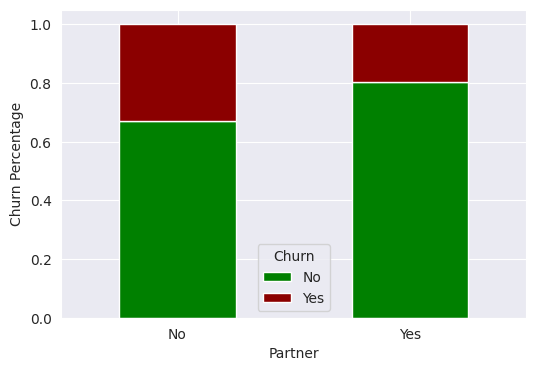

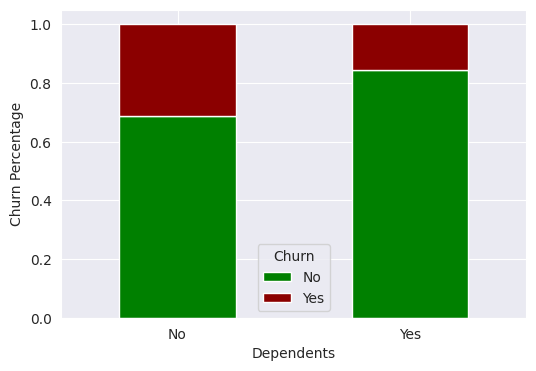

In [7]:
stacked_plot(df, "gender", "Churn")
stacked_plot(df, "SeniorCitizen", "Churn")
stacked_plot(df, "Partner", "Churn")
stacked_plot(df, "Dependents", "Churn")

In [8]:
df[(df.SeniorCitizen == 0) & (df.Partner == 'Yes') & (df.Dependents == 'Yes')].Churn.value_counts()

Churn
No     1437
Yes     229
Name: count, dtype: int64

In [9]:
df[(df.SeniorCitizen == 0) & (df.Partner == 'Yes') & (df.Dependents == 'No')].Churn.value_counts()

Churn
No     921
Yes    242
Name: count, dtype: int64

In [10]:
df[(df.SeniorCitizen == 0) & (df.Partner == 'No') & (df.Dependents == 'Yes')].Churn.value_counts()

Churn
No     278
Yes     75
Name: count, dtype: int64

In [11]:
df[(df.SeniorCitizen == 0) & (df.Partner == 'No') & (df.Dependents == 'No')].Churn.value_counts()

Churn
No     1872
Yes     847
Name: count, dtype: int64

### Tenure

In [12]:
df['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [13]:
df['tenure'].value_counts().head(10)

tenure
1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
9     119
Name: count, dtype: int64

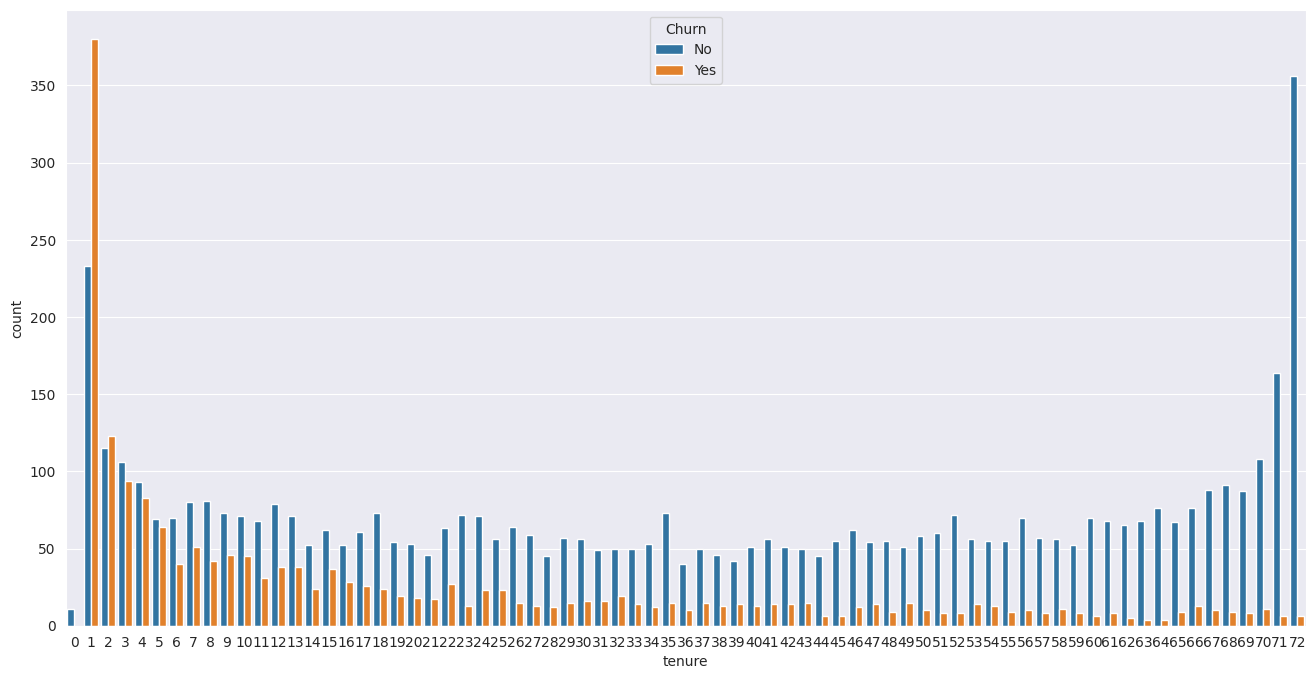

In [14]:
plt.figure(figsize=(16,8))
sns.countplot(x="tenure", hue="Churn", data=df)
plt.show()

In [15]:
def tenure(t):
    if t<=12:
        return 1
    elif t>12 and t<=24:
        return 2
    elif t>24 and t<=36:
        return 3
    elif t>36 and t<=48:
        return 4
    elif t>48 and t<=60:
        return 5
    else:
        return 6

df["tenure_group"]=df["tenure"].apply(lambda x: tenure(x))

In [16]:
df["tenure_group"].value_counts()

tenure_group
1    2186
6    1407
2    1024
3     832
5     832
4     762
Name: count, dtype: int64

<Axes: xlabel='tenure_group', ylabel='count'>

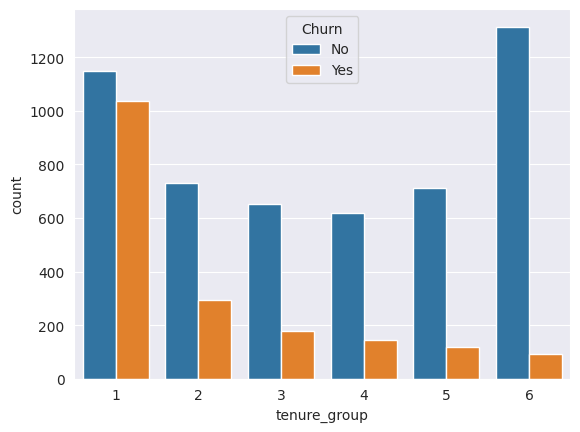

In [17]:
sns.countplot(x="tenure_group", hue="Churn", data=df)

### Phone Service and MultipleLines

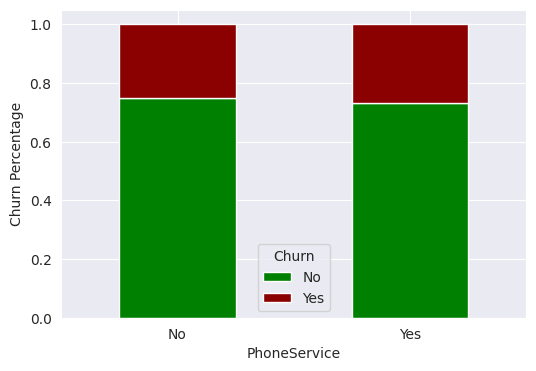

In [18]:
stacked_plot(df, "PhoneService", "Churn")

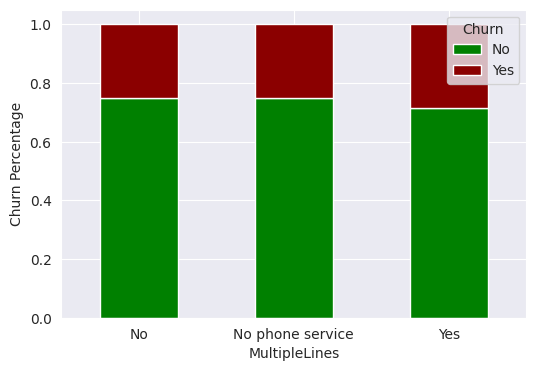

In [19]:
stacked_plot(df, "MultipleLines", "Churn")

### OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies

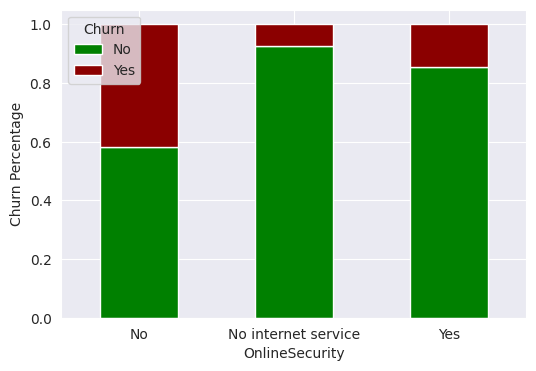

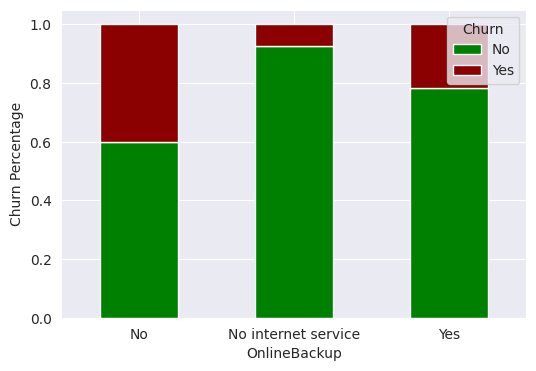

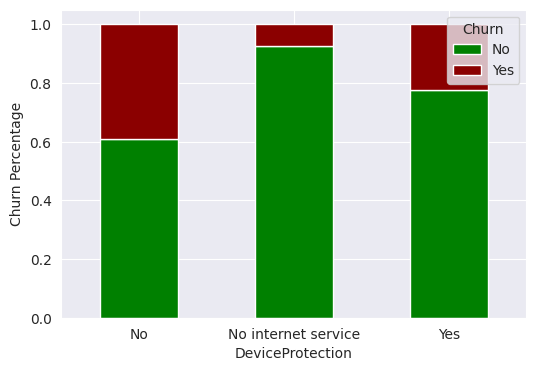

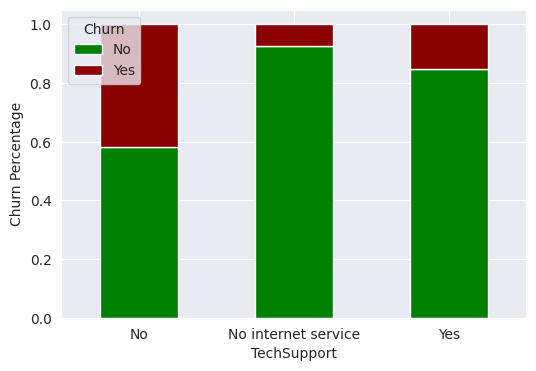

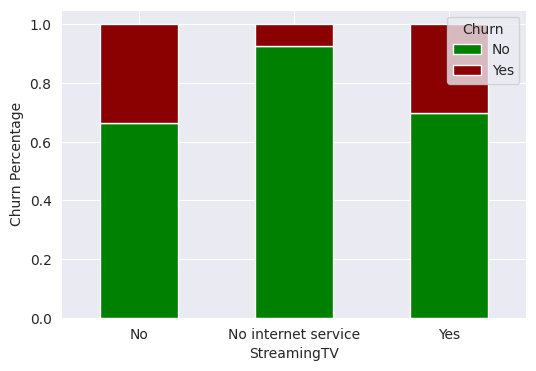

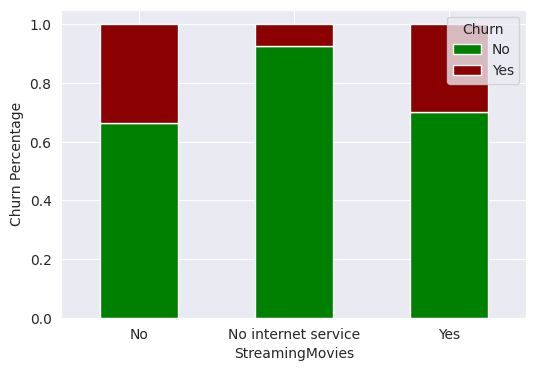

In [20]:
stacked_plot(df, "OnlineSecurity", "Churn")
stacked_plot(df, "OnlineBackup", "Churn")
stacked_plot(df, "DeviceProtection", "Churn")
stacked_plot(df, "TechSupport", "Churn")
stacked_plot(df, "StreamingTV", "Churn")
stacked_plot(df, "StreamingMovies", "Churn")

<ipython-input-21-4837baa48aae>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.tenure[df.OnlineSecurity == "No"], hist_kws=dict(alpha=0.3), label="No")
<ipython-input-21-4837baa48aae>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.tenure[df.OnlineSecurity == "Yes"], hist_kws=dict(alpha

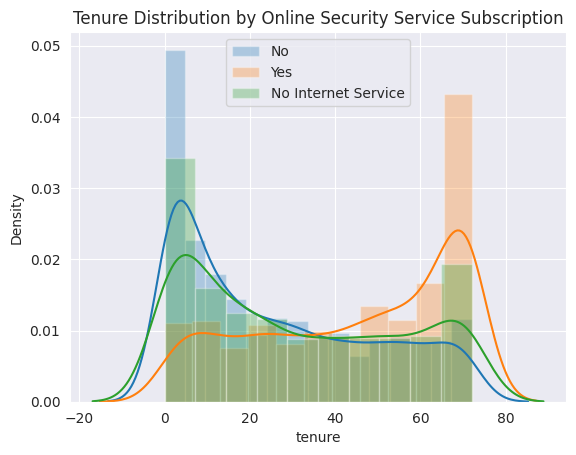

In [21]:
sns.distplot(df.tenure[df.OnlineSecurity == "No"], hist_kws=dict(alpha=0.3), label="No")
sns.distplot(df.tenure[df.OnlineSecurity == "Yes"], hist_kws=dict(alpha=0.3), label="Yes")
sns.distplot(df.tenure[df.OnlineSecurity == "No internet service"], hist_kws=dict(alpha=0.3), label="No Internet Service")
plt.title("Tenure Distribution by Online Security Service Subscription")
plt.legend()
plt.show()

<ipython-input-22-24a32d87d586>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.tenure[df.StreamingTV == "No"], hist_kws=dict(alpha=0.3), label="No")
<ipython-input-22-24a32d87d586>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.tenure[df.StreamingTV == "Yes"], hist_kws=dict(alpha=0.3),

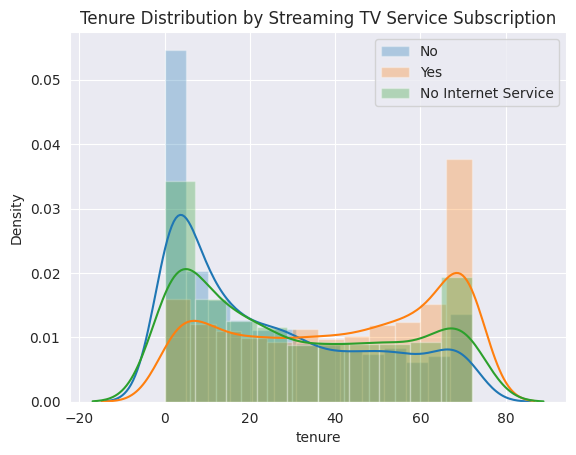

In [22]:
sns.distplot(df.tenure[df.StreamingTV == "No"], hist_kws=dict(alpha=0.3), label="No")
sns.distplot(df.tenure[df.StreamingTV == "Yes"], hist_kws=dict(alpha=0.3), label="Yes")
sns.distplot(df.tenure[df.StreamingTV == "No internet service"], hist_kws=dict(alpha=0.3), label="No Internet Service")
plt.title("Tenure Distribution by Streaming TV Service Subscription")
plt.legend()
plt.show()

<ipython-input-23-8016b998fa0c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.tenure[df.StreamingMovies == "No"], hist_kws=dict(alpha=0.3), label="No")
<ipython-input-23-8016b998fa0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.tenure[df.StreamingMovies == "Yes"], hist_kws=dict(alp

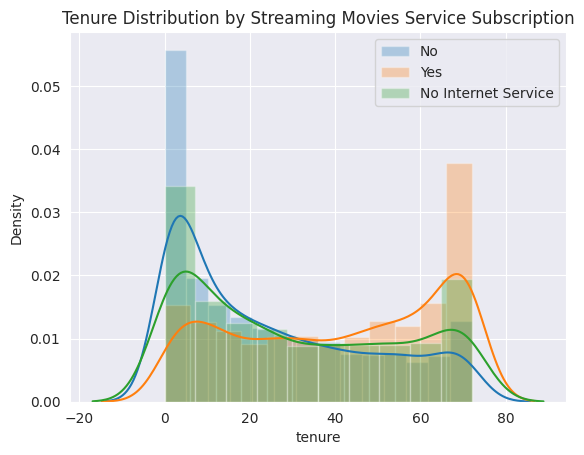

In [23]:
sns.distplot(df.tenure[df.StreamingMovies == "No"], hist_kws=dict(alpha=0.3), label="No")
sns.distplot(df.tenure[df.StreamingMovies == "Yes"], hist_kws=dict(alpha=0.3), label="Yes")
sns.distplot(df.tenure[df.StreamingMovies == "No internet service"], hist_kws=dict(alpha=0.3), label="No Internet Service")
plt.title("Tenure Distribution by Streaming Movies Service Subscription")
plt.legend()
plt.show()

### InternetService

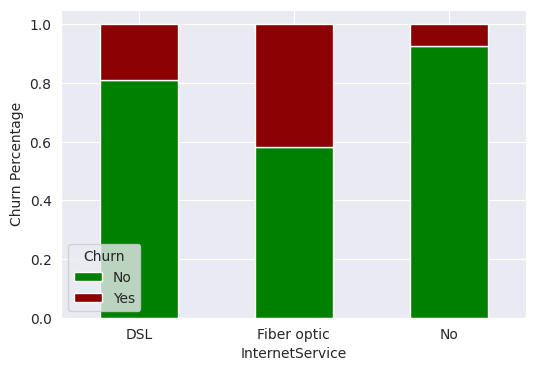

In [24]:
stacked_plot(df, "InternetService", "Churn")

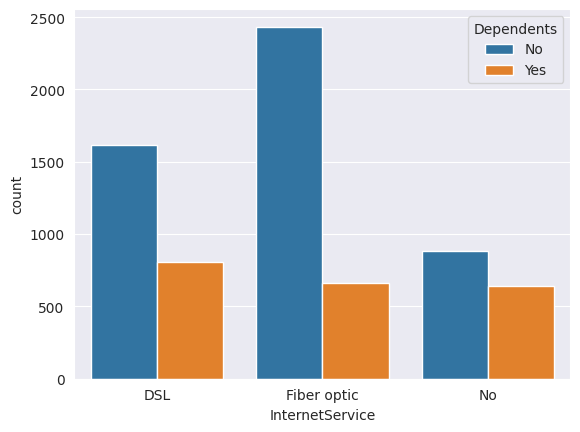

In [25]:
sns.countplot(x='InternetService', hue='Dependents', data=df)

plt.show()



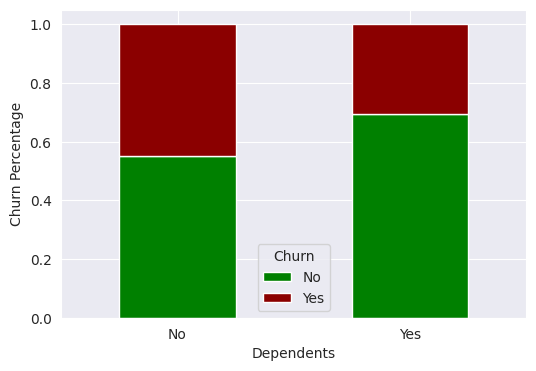

In [26]:
stacked_plot(df[df.InternetService == "Fiber optic"], "Dependents", "Churn")

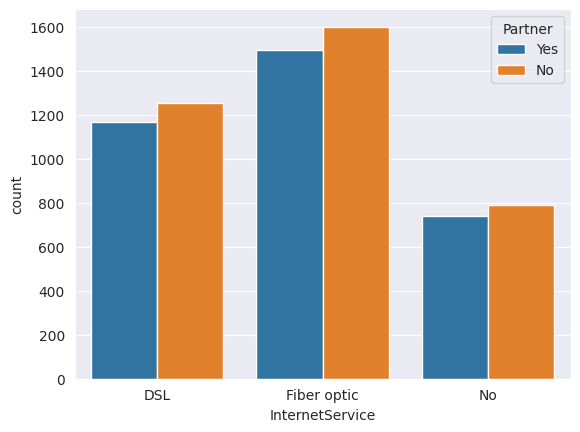

In [27]:
sns.countplot(x='InternetService', hue='Partner', data=df)

plt.show()


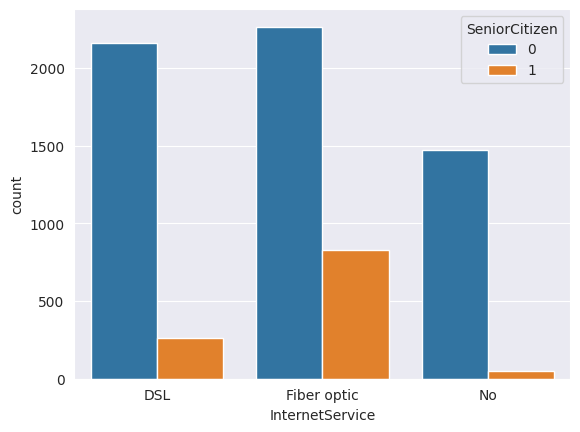

In [28]:


sns.countplot(x='InternetService', hue='SeniorCitizen', data=df)

plt.show()

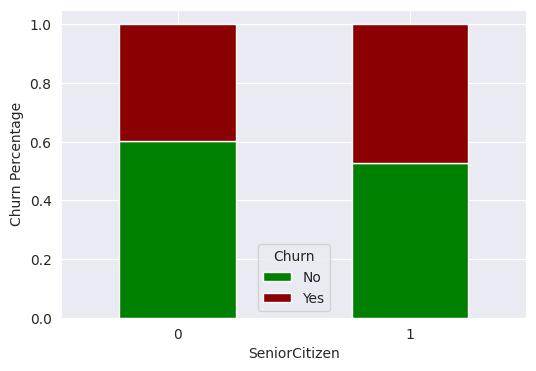

In [29]:
stacked_plot(df[df.InternetService == "Fiber optic"], "SeniorCitizen", "Churn")

<ipython-input-30-b3e37ad1c29a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.tenure[df.InternetService == "No"], hist_kws=dict(alpha=0.3), label="No")
<ipython-input-30-b3e37ad1c29a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.tenure[df.InternetService == "DSL"], hist_kws=dict(alp

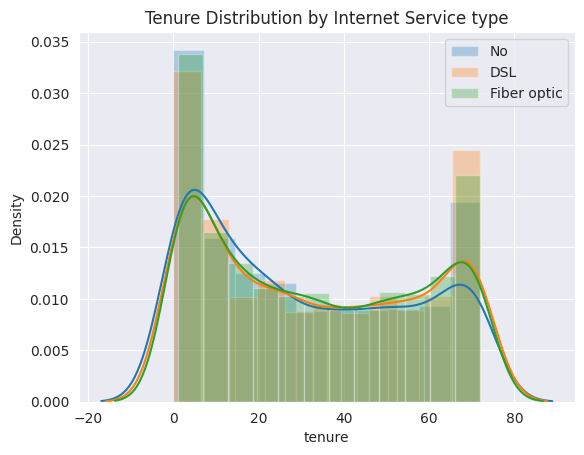

In [30]:
sns.distplot(df.tenure[df.InternetService == "No"], hist_kws=dict(alpha=0.3), label="No")
sns.distplot(df.tenure[df.InternetService == "DSL"], hist_kws=dict(alpha=0.3), label="DSL")
sns.distplot(df.tenure[df.InternetService == "Fiber optic"], hist_kws=dict(alpha=0.3), label="Fiber optic")
plt.title("Tenure Distribution by Internet Service type")
plt.legend()
plt.show()

In [31]:
df[df.InternetService == 'No'].head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
11,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8,No,2
16,Female,0,No,No,52,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No,5
21,Male,0,Yes,No,12,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,No,1
22,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes,1
33,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.2,No,1


In [32]:
df[df.InternetService == 'No'].OnlineSecurity.value_counts()

OnlineSecurity
No internet service    1526
Name: count, dtype: int64

In [33]:
df[df.InternetService == 'No'].OnlineBackup.value_counts()

OnlineBackup
No internet service    1526
Name: count, dtype: int64

In [34]:
df[df.InternetService == 'No'].DeviceProtection.value_counts()

DeviceProtection
No internet service    1526
Name: count, dtype: int64

In [35]:
df[df.InternetService == 'No'].TechSupport.value_counts()

TechSupport
No internet service    1526
Name: count, dtype: int64

In [36]:
df[df.InternetService == 'No'].StreamingMovies.value_counts()

StreamingMovies
No internet service    1526
Name: count, dtype: int64

In [37]:
df[df.InternetService == 'No'].StreamingTV.value_counts()

StreamingTV
No internet service    1526
Name: count, dtype: int64

### Contract

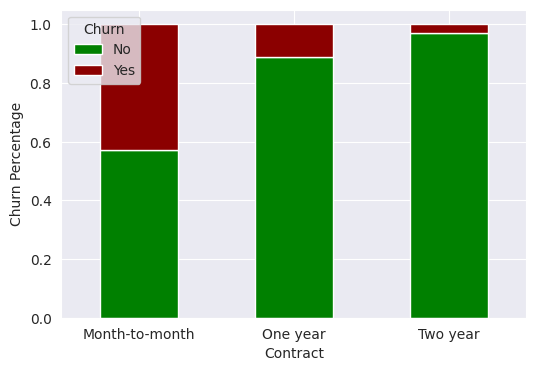

In [38]:
stacked_plot(df, "Contract", "Churn")

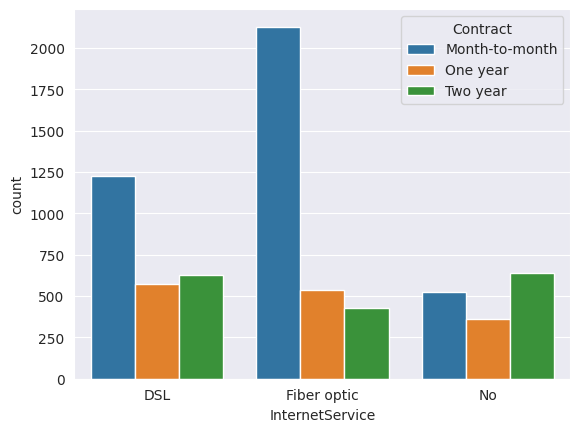

In [39]:
sns.countplot(x='InternetService', hue='Contract', data=df)

plt.show()

### PaymentMethod

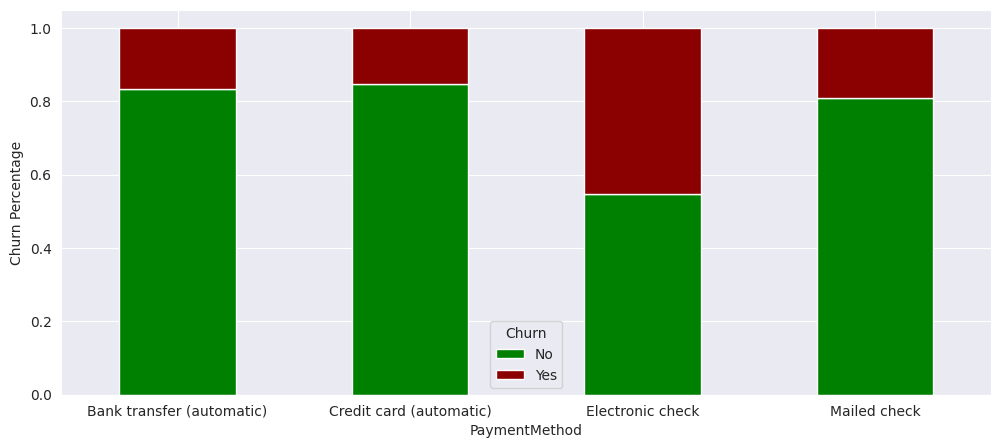

In [40]:
group = "PaymentMethod"
target = "Churn"
fig, ax = plt.subplots(figsize = (12,5))
temp_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
temp_df.plot(kind='bar', stacked=True, ax = ax, color = ["green", "darkred"])
ax.xaxis.set_tick_params(rotation=0)
ax.set_xlabel(group)
ax.set_ylabel('Churn Percentage');

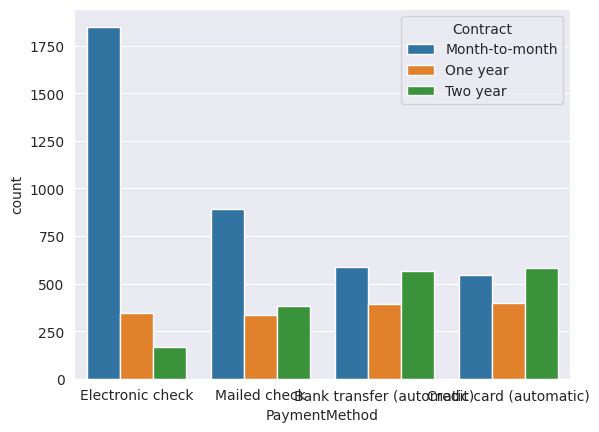

In [41]:
sns.countplot(x='PaymentMethod', hue='Contract', data=df)

plt.show()

### PaperlessBilling

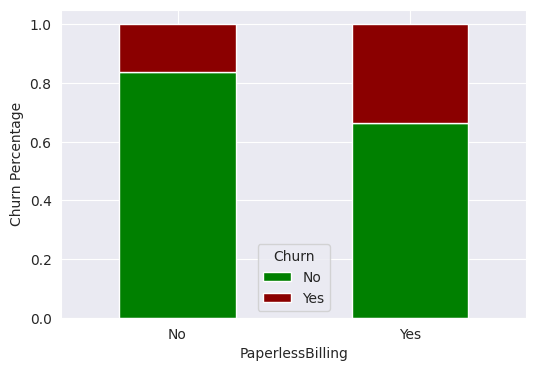

In [42]:
stacked_plot(df, "PaperlessBilling", "Churn")

### TotalCharges

In [43]:
df.TotalCharges.describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [44]:
df['TotalCharges'] = df["TotalCharges"].replace(" ",np.nan)
df['TotalCharges'].isna().sum()

11

In [45]:
df[df["TotalCharges"].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,1
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No,1
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,...,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No,1
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No,1
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No,1
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No,1
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No,1
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No,1
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No,1
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,...,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No,1


In [46]:
df.loc[df["TotalCharges"].isnull(), 'TotalCharges'] = 0
df.isnull().any().any()

False

In [47]:
df['TotalCharges'] = df["TotalCharges"].astype(float)

Churn = df[df.Churn=="Yes"]
Not_Churn = df[df.Churn=="No"]

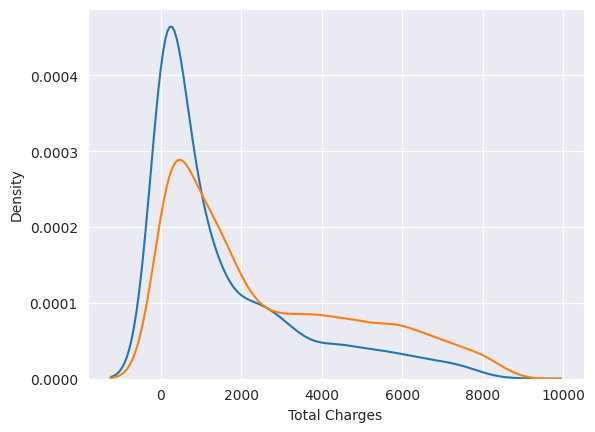

In [48]:
fig, ax = plt.subplots()
sns.kdeplot(Churn["TotalCharges"],label = "Churn", ax= ax)
sns.kdeplot(Not_Churn["TotalCharges"], label = "Not Churn", ax=ax)
ax.set_xlabel("Total Charges");

### Monthly Charges

In [49]:
df.MonthlyCharges.describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [50]:
df.MonthlyCharges.isna().sum()

0

<Axes: xlabel='MonthlyCharges', ylabel='Density'>

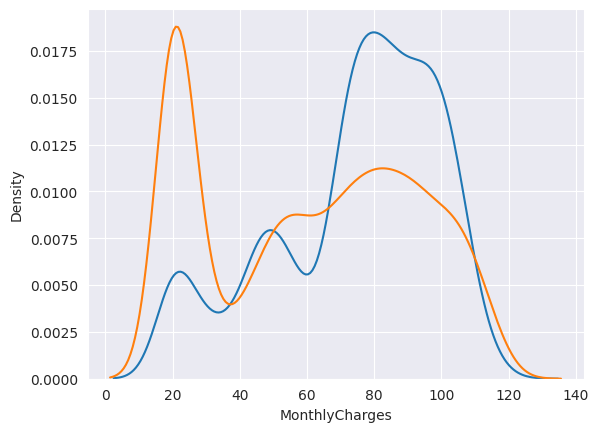

In [51]:
sns.kdeplot(Churn["MonthlyCharges"], label = "Churn")
sns.kdeplot(Not_Churn["MonthlyCharges"], label = "Not Churn")

In [52]:
np.corrcoef(df.TotalCharges, df.MonthlyCharges*df.tenure)

array([[1.        , 0.99956055],
       [0.99956055, 1.        ]])

## Fucntion to prepare data for model building based on EDA

In [53]:
def datapreparation(filepath):

    df = pd.read_csv(filepath)
    df.drop(["customerID"], inplace = True, axis = 1)

    df.TotalCharges = df.TotalCharges.replace(" ",np.nan)
    df.TotalCharges.fillna(0, inplace = True)
    df.TotalCharges = df.TotalCharges.astype(float)

    cols1 = ['Partner', 'Dependents', 'PaperlessBilling', 'Churn', 'PhoneService']
    for col in cols1:
        df[col] = df[col].apply(lambda x: 0 if x == "No" else 1)

    df.gender = df.gender.apply(lambda x: 0 if x == "Male" else 1)
    df.MultipleLines = df.MultipleLines.map({'No phone service': 0, 'No': 0, 'Yes': 1})

    cols2 = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    for col in cols2:
        df[col] = df[col].map({'No internet service': 0, 'No': 0, 'Yes': 1})

    df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)

    return df

In [54]:
!pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 20.4 MB/s eta 0:00:00


In [55]:
!pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.3/491.3 kB 10.9 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=89f461ced6a3391aa5a6b91f55f071093c8caa59ea1e1327ae46af2cb9f3bfd7
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import statsmodels.api as st
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#Lifelines is a survival analysis package
from lifelines import KaplanMeierFitter
from lifelines.statistics import multivariate_logrank_test
from lifelines.statistics import logrank_test
from lifelines import CoxPHFitter

## Data Preparation

In [57]:
df = pd.read_csv("/content/Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [59]:
df.Churn = labelencoder.fit_transform(df.Churn)
df.Churn.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [60]:
eventvar = df['Churn']
timevar = df['tenure']

In [61]:
categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod']

survivaldata = pd.get_dummies(df, columns = categorical, drop_first= True)
survivaldata.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,29.85,29.85,0,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
1,5575-GNVDE,34,56.95,1889.5,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True
2,3668-QPYBK,2,53.85,108.15,1,True,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True
3,7795-CFOCW,45,42.30,1840.75,0,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,9237-HQITU,2,70.70,151.65,1,False,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False


We need to drop variables such as customerID, tenure, Churn as they are not needed in survival data. Also, we need to add constant for survival analysis.

In [62]:
survivaldata.drop(['customerID', 'tenure', 'Churn'], axis = 1, inplace= True)
survivaldata = st.add_constant(survivaldata, prepend=False)
survivaldata.head()

,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,const
0,29.85,29.85,False,False,True,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,1.0
1,56.95,1889.5,True,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,1.0
2,53.85,108.15,True,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,True,1.0
3,42.30,1840.75,True,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,1.0
4,70.70,151.65,False,False,False,False,True,False,False,True,...,False,False,False,False,False,True,False,True,False,1.0


## Survival Analysis

### Kaplan-Meier Curve

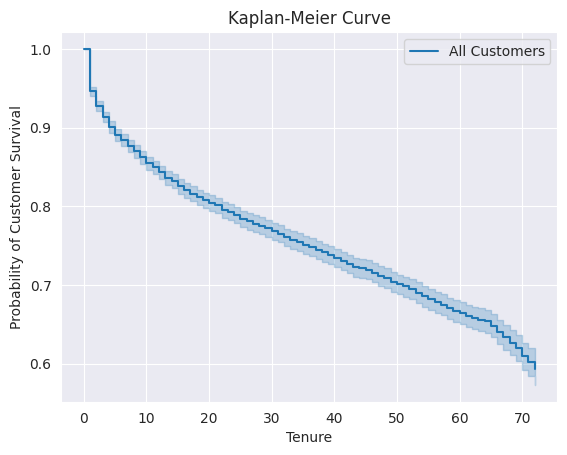

In [63]:

kmf = KaplanMeierFitter()
kmf.fit(timevar,event_observed = eventvar,label = "All Customers")
kmf.plot()
plt.ylabel('Probability of Customer Survival')
plt.xlabel('Tenure')
plt.title('Kaplan-Meier Curve');

### Log-Rank Test

### Gender

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.53 0.47      1.09

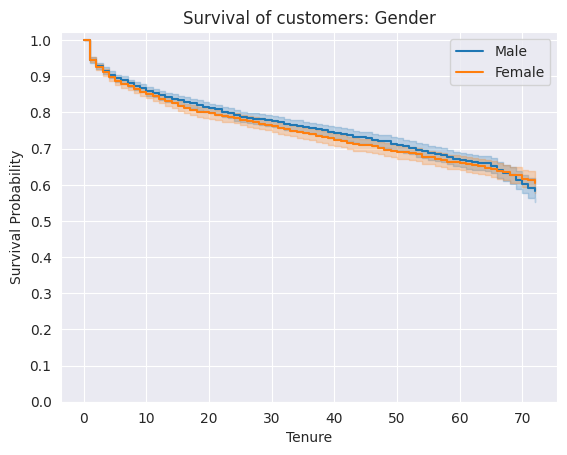

In [64]:
male = (survivaldata['gender_Male'] == 1)
female = (survivaldata['gender_Male'] == 0)

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[male],event_observed = eventvar[male],label = "Male")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[female],event_observed = eventvar[female],label = "Female")
plot2 = kmf.plot(ax = plot1)

plt.title('Survival of customers: Gender')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
groups = logrank_test(timevar[male], timevar[female], event_observed_A=eventvar[male], event_observed_B=eventvar[female])
groups.print_summary()

### Senior Citizen

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         109.49 <0.005     82.71

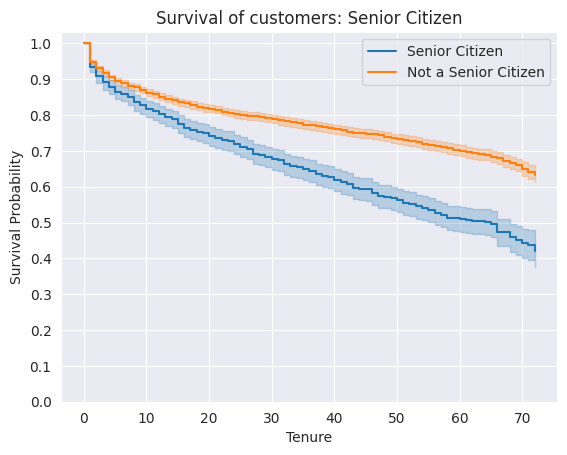

In [65]:
SeniorCitizen = (survivaldata['SeniorCitizen_1'] == 1)
no_SeniorCitizen = (survivaldata['SeniorCitizen_1'] == 0)

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[SeniorCitizen],event_observed = eventvar[SeniorCitizen],label = "Senior Citizen")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[no_SeniorCitizen],event_observed = eventvar[no_SeniorCitizen],label = "Not a Senior Citizen")
plot2 = kmf.plot(ax = plot1)

plt.title('Survival of customers: Senior Citizen')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
groups = logrank_test(timevar[SeniorCitizen], timevar[no_SeniorCitizen], event_observed_A=eventvar[SeniorCitizen], event_observed_B=eventvar[no_SeniorCitizen])
groups.print_summary()

### Partner

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         423.54 <0.005    310.21

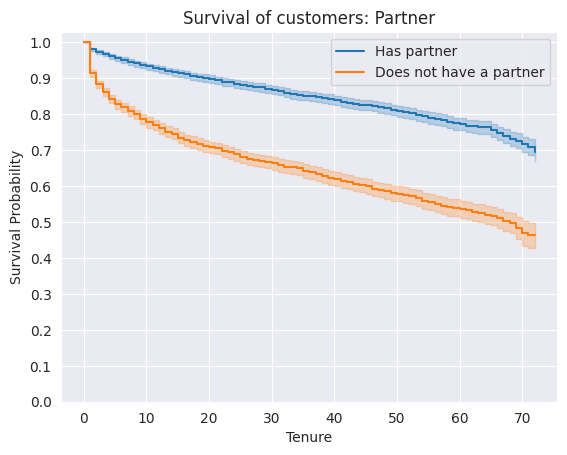

In [66]:
partner = (survivaldata['Partner_Yes'] == 1)
no_partner = (survivaldata['Partner_Yes'] == 0)

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[partner],event_observed = eventvar[partner],label = "Has partner")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[no_partner],event_observed = eventvar[no_partner],label = "Does not have a partner")
plot2 = kmf.plot(ax = plot1)

plt.title('Survival of customers: Partner')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
groups = logrank_test(timevar[partner], timevar[no_partner], event_observed_A=eventvar[partner], event_observed_B=eventvar[no_partner])
groups.print_summary()

### Dependents

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         232.70 <0.005    172.12

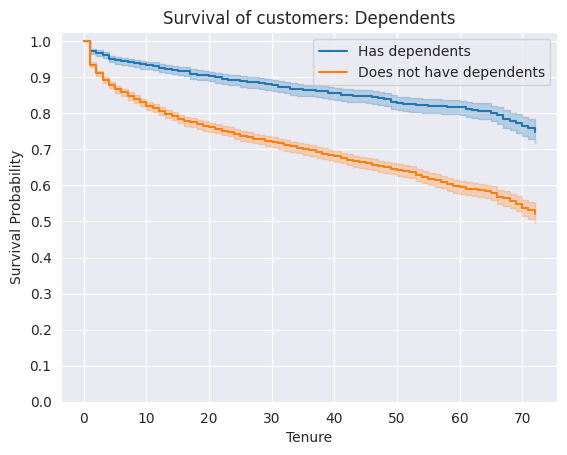

In [67]:
Dependents = (survivaldata['Dependents_Yes'] == 1)
no_Dependents = (survivaldata['Dependents_Yes'] == 0)

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[Dependents],event_observed = eventvar[Dependents],label = "Has dependents")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[no_Dependents],event_observed = eventvar[no_Dependents],label = "Does not have dependents")
plot2 = kmf.plot(ax = plot1)

plt.title('Survival of customers: Dependents')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
groups = logrank_test(timevar[Dependents], timevar[no_Dependents], event_observed_A=eventvar[Dependents], event_observed_B=eventvar[no_Dependents])
groups.print_summary()

### PhoneService

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.43 0.51      0.97

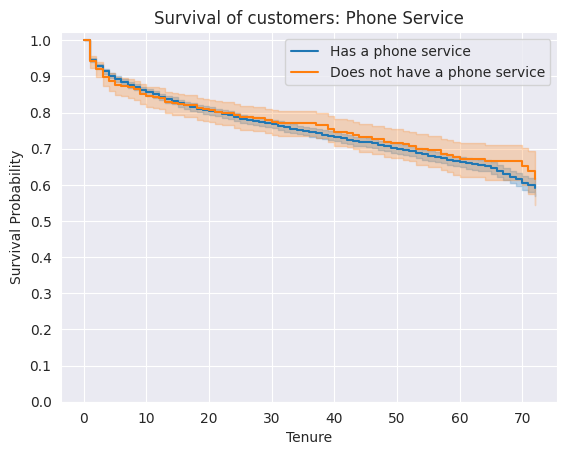

In [68]:
PhoneService = (survivaldata['PhoneService_Yes'] == 1)
no_PhoneService = (survivaldata['PhoneService_Yes'] == 0)

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[PhoneService],event_observed = eventvar[PhoneService],label = "Has a phone service")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[no_PhoneService],event_observed = eventvar[no_PhoneService],label = "Does not have a phone service")
plot2 = kmf.plot(ax = plot1)

plt.title('Survival of customers: Phone Service')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
groups = logrank_test(timevar[PhoneService], timevar[no_PhoneService], event_observed_A=eventvar[PhoneService], event_observed_B=eventvar[no_PhoneService])
groups.print_summary()

### MultipleLines

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
          30.97 <0.005     22.34

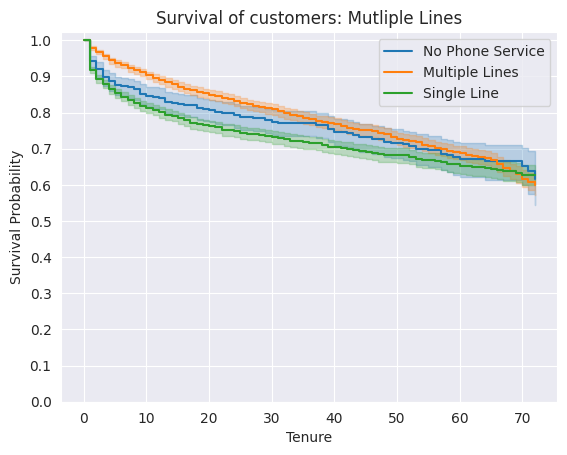

In [69]:
no_phone = (survivaldata['MultipleLines_No phone service'] == 1)
multiLines = (survivaldata['MultipleLines_Yes'] == 1)
no_multiLines = ((survivaldata['MultipleLines_Yes'] == 0) & (survivaldata['MultipleLines_No phone service'] == 0))

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[no_phone],event_observed = eventvar[no_phone],label = "No Phone Service")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[multiLines],event_observed = eventvar[multiLines],label = "Multiple Lines")
plot2 = kmf.plot(ax = plot1)

kmf.fit(timevar[no_multiLines],event_observed = eventvar[no_multiLines],label = "Single Line")
plot3 = kmf.plot(ax = plot2)

plt.title('Survival of customers: Mutliple Lines')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(df['tenure'], df['MultipleLines'], df['Churn'], alpha = 0.95)
twoplusgroups_logrank.print_summary()

### Internet Service

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         520.12 <0.005    375.19

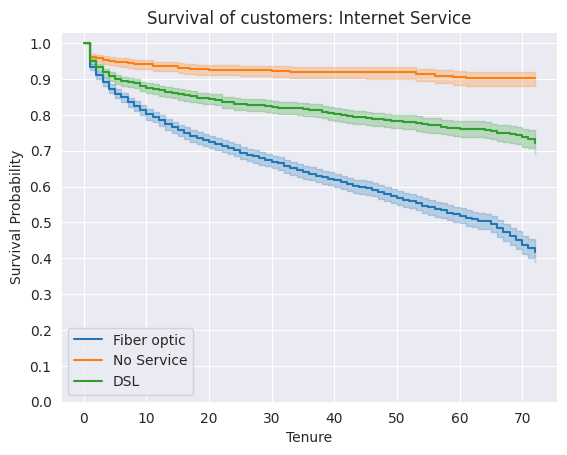

In [70]:
Fiber_optic = (survivaldata['InternetService_Fiber optic'] == 1)
No_Service = (survivaldata['InternetService_No'] == 1)
DSL = ((survivaldata['InternetService_Fiber optic'] == 0) & (survivaldata['InternetService_No'] == 0))

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[Fiber_optic],event_observed = eventvar[Fiber_optic],label = "Fiber optic")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[No_Service],event_observed = eventvar[No_Service],label = "No Service")
plot2 = kmf.plot(ax = plot1)

kmf.fit(timevar[DSL],event_observed = eventvar[DSL],label = "DSL")
plot3 = kmf.plot(ax = plot2)

plt.title('Survival of customers: Internet Service')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(df['tenure'], df['InternetService'], df['Churn'], alpha = 0.95)
twoplusgroups_logrank.print_summary()

### Online Security

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
        1013.86 <0.005    731.35

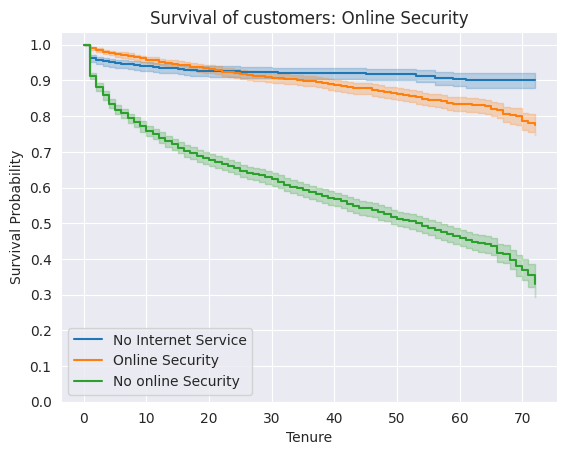

In [71]:
no_internetService = (survivaldata['OnlineSecurity_No internet service'] == 1)
onlineSecurity = (survivaldata['OnlineSecurity_Yes'] == 1)
no_onlineSecurity = ((survivaldata['OnlineSecurity_No internet service'] == 0) & (survivaldata['OnlineSecurity_Yes'] == 0))

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[no_internetService],event_observed = eventvar[no_internetService],label = "No Internet Service")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[onlineSecurity],event_observed = eventvar[onlineSecurity],label = "Online Security")
plot2 = kmf.plot(ax = plot1)

kmf.fit(timevar[no_onlineSecurity],event_observed = eventvar[no_onlineSecurity],label = "No online Security")
plot3 = kmf.plot(ax = plot2)

plt.title('Survival of customers: Online Security')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(df['tenure'], df['OnlineSecurity'], df['Churn'], alpha = 0.95)
twoplusgroups_logrank.print_summary()

### Online Backup

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         821.34 <0.005    592.47

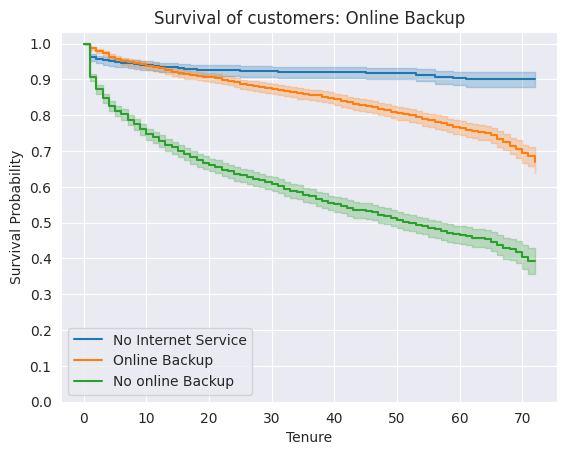

In [72]:
no_internetService = (survivaldata['OnlineBackup_No internet service'] == 1)
onlineBackup = (survivaldata['OnlineBackup_Yes'] == 1)
no_onlineBackup = ((survivaldata['OnlineBackup_No internet service'] == 0) & (survivaldata['OnlineBackup_Yes'] == 0))

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[no_internetService],event_observed = eventvar[no_internetService],label = "No Internet Service")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[onlineBackup],event_observed = eventvar[onlineBackup],label = "Online Backup")
plot2 = kmf.plot(ax = plot1)

kmf.fit(timevar[no_onlineBackup],event_observed = eventvar[no_onlineBackup],label = "No online Backup")
plot3 = kmf.plot(ax = plot2)

plt.title('Survival of customers: Online Backup')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(df['tenure'], df['OnlineBackup'], df['Churn'], alpha = 0.95)
twoplusgroups_logrank.print_summary()

### Device Protection

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         763.51 <0.005    550.75

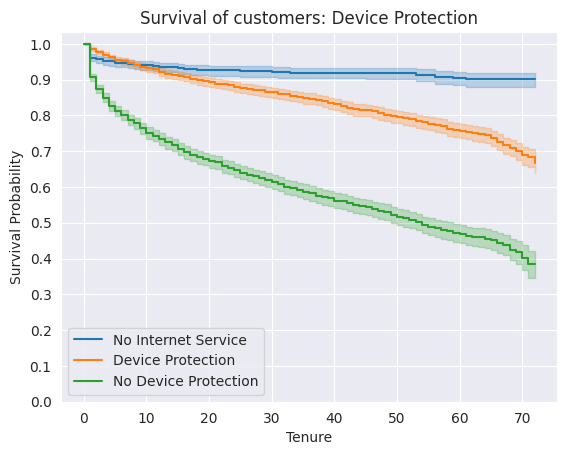

In [73]:
no_internetService = (survivaldata['DeviceProtection_No internet service'] == 1)
DeviceProtection = (survivaldata['DeviceProtection_Yes'] == 1)
no_DeviceProtection = ((survivaldata['DeviceProtection_No internet service'] == 0) & (survivaldata['DeviceProtection_Yes'] == 0))

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[no_internetService],event_observed = eventvar[no_internetService],label = "No Internet Service")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[DeviceProtection],event_observed = eventvar[DeviceProtection],label = "Device Protection")
plot2 = kmf.plot(ax = plot1)

kmf.fit(timevar[no_DeviceProtection],event_observed = eventvar[no_DeviceProtection],label = "No Device Protection")
plot3 = kmf.plot(ax = plot2)

plt.title('Survival of customers: Device Protection')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(df['tenure'], df['DeviceProtection'], df['Churn'], alpha = 0.95)
twoplusgroups_logrank.print_summary()

### Tech Support

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         989.56 <0.005    713.82

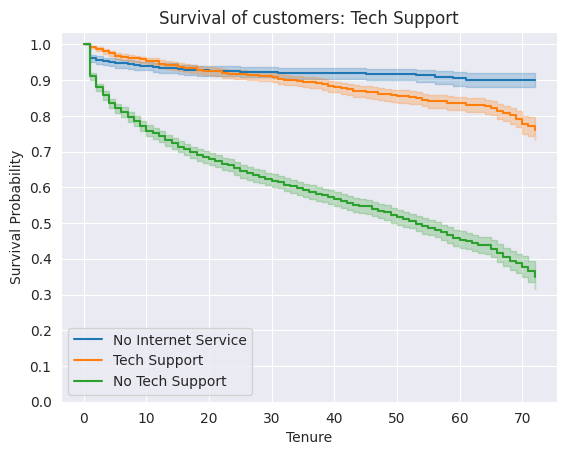

In [74]:
no_internetService = (survivaldata['TechSupport_No internet service'] == 1)
TechSupport = (survivaldata['TechSupport_Yes'] == 1)
no_TechSupport = ((survivaldata['TechSupport_No internet service'] == 0) & (survivaldata['TechSupport_Yes'] == 0))

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[no_internetService],event_observed = eventvar[no_internetService],label = "No Internet Service")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[TechSupport],event_observed = eventvar[TechSupport],label = "Tech Support")
plot2 = kmf.plot(ax = plot1)

kmf.fit(timevar[no_TechSupport],event_observed = eventvar[no_TechSupport],label = "No Tech Support")
plot3 = kmf.plot(ax = plot2)

plt.title('Survival of customers: Tech Support')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(df['tenure'], df['TechSupport'], df['Churn'], alpha = 0.95)
twoplusgroups_logrank.print_summary()

### Streaming TV

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         368.31 <0.005    265.68

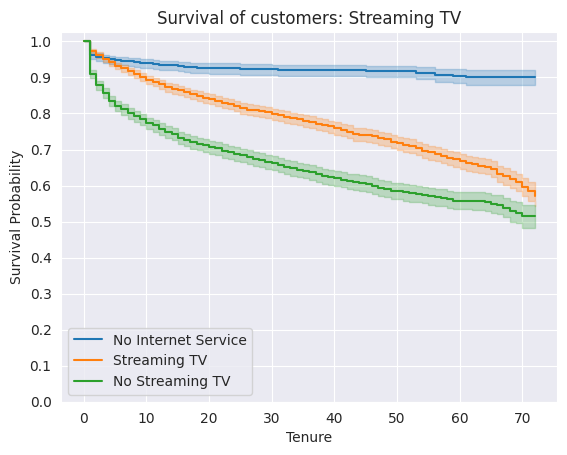

In [75]:
no_internetService = (survivaldata['StreamingTV_No internet service'] == 1)
StreamingTV = (survivaldata['StreamingTV_Yes'] == 1)
no_StreamingTV = ((survivaldata['StreamingTV_No internet service'] == 0) & (survivaldata['StreamingTV_Yes'] == 0))

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[no_internetService],event_observed = eventvar[no_internetService],label = "No Internet Service")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[StreamingTV],event_observed = eventvar[StreamingTV],label = "Streaming TV")
plot2 = kmf.plot(ax = plot1)

kmf.fit(timevar[no_StreamingTV],event_observed = eventvar[no_StreamingTV],label = "No Streaming TV")
plot3 = kmf.plot(ax = plot2)

plt.title('Survival of customers: Streaming TV')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(df['tenure'], df['StreamingTV'], df['Churn'], alpha = 0.95)
twoplusgroups_logrank.print_summary()

### Streaming Movies

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         378.43 <0.005    272.98

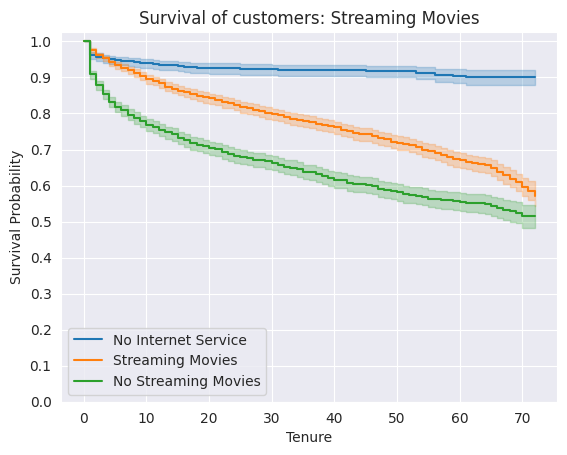

In [76]:
no_internetService = (survivaldata['StreamingMovies_No internet service'] == 1)
StreamingMovies = (survivaldata['StreamingMovies_Yes'] == 1)
no_StreamingMovies = ((survivaldata['StreamingMovies_No internet service'] == 0) & (survivaldata['StreamingMovies_Yes'] == 0))

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[no_internetService],event_observed = eventvar[no_internetService],label = "No Internet Service")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[StreamingMovies],event_observed = eventvar[StreamingMovies],label = "Streaming Movies")
plot2 = kmf.plot(ax = plot1)

kmf.fit(timevar[no_StreamingMovies],event_observed = eventvar[no_StreamingMovies],label = "No Streaming Movies")
plot3 = kmf.plot(ax = plot2)

plt.title('Survival of customers: Streaming Movies')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(df['tenure'], df['StreamingMovies'], df['Churn'], alpha = 0.95)
twoplusgroups_logrank.print_summary()

### Contract

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
        2352.87 <0.005       inf

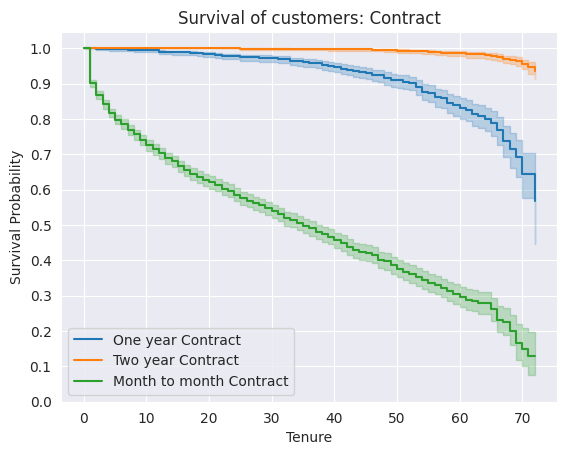

In [77]:
Contract_One_year = (survivaldata['Contract_One year'] == 1)
Contract_Two_year = (survivaldata['Contract_Two year'] == 1)
Contract_month_to_month = ((survivaldata['Contract_One year'] == 0) & (survivaldata['Contract_Two year'] == 0))

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[Contract_One_year],event_observed = eventvar[Contract_One_year],label = "One year Contract")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[Contract_Two_year],event_observed = eventvar[Contract_Two_year],label = "Two year Contract")
plot2 = kmf.plot(ax = plot1)

kmf.fit(timevar[Contract_month_to_month],event_observed = eventvar[Contract_month_to_month],label = "Month to month Contract")
plot3 = kmf.plot(ax = plot2)

plt.title('Survival of customers: Contract')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(df['tenure'], df['Contract'], df['Churn'], alpha = 0.95)
twoplusgroups_logrank.print_summary()

### Payment Method

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 3
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         865.24 <0.005    619.58

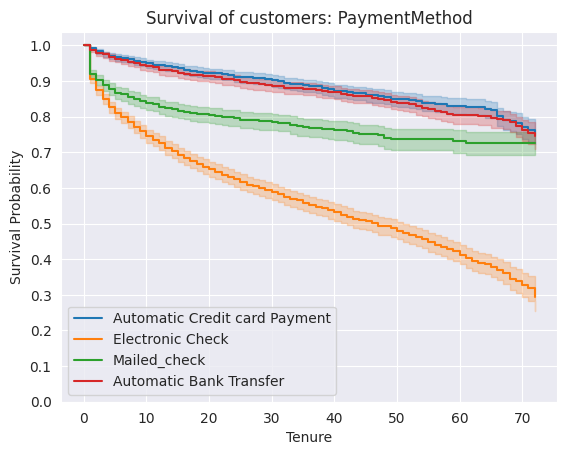

In [78]:
automatic_Credit_Card = (survivaldata['PaymentMethod_Credit card (automatic)'] == 1)
electronic_check = (survivaldata['PaymentMethod_Electronic check'] == 1)
mailed_check = (survivaldata['PaymentMethod_Mailed check'] == 1)
automatic_Bank_Transfer = ((survivaldata['PaymentMethod_Credit card (automatic)'] == 0) & (survivaldata['PaymentMethod_Electronic check'] == 0) & (survivaldata['PaymentMethod_Mailed check'] == 0))

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[automatic_Credit_Card],event_observed = eventvar[automatic_Credit_Card],label = "Automatic Credit card Payment")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[electronic_check],event_observed = eventvar[electronic_check],label = "Electronic Check")
plot2 = kmf.plot(ax = plot1)

kmf.fit(timevar[mailed_check],event_observed = eventvar[mailed_check],label = "Mailed_check")
plot3 = kmf.plot(ax = plot2)

kmf.fit(timevar[automatic_Bank_Transfer],event_observed = eventvar[automatic_Bank_Transfer],label = "Automatic Bank Transfer")
plot4 = kmf.plot(ax = plot3)

plt.title('Survival of customers: PaymentMethod')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(df['tenure'], df['PaymentMethod'], df['Churn'], alpha = 0.95)
twoplusgroups_logrank.print_summary()

### Paperless Billing

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         189.51 <0.005    140.82

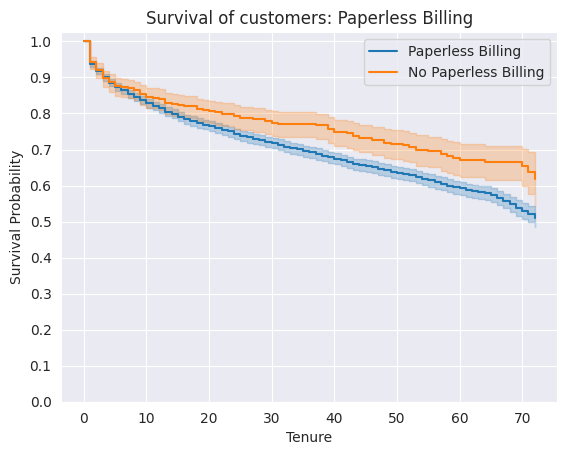

In [79]:
PaperlessBilling = (survivaldata['PaperlessBilling_Yes'] == 1)
no_PaperlessBilling = (survivaldata['PaperlessBilling_Yes'] == 0)

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[PaperlessBilling],event_observed = eventvar[PaperlessBilling],label = "Paperless Billing")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[no_PhoneService],event_observed = eventvar[no_PhoneService],label = "No Paperless Billing")
plot2 = kmf.plot(ax = plot1)

plt.title('Survival of customers: Paperless Billing')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
groups = logrank_test(timevar[PaperlessBilling], timevar[no_PaperlessBilling], event_observed_A=eventvar[PaperlessBilling], event_observed_B=eventvar[no_PaperlessBilling])
groups.print_summary()

## Survival Regression

In [80]:
def datapreparation(filepath):

    df = pd.read_csv(filepath)
    df.drop(["customerID"], inplace = True, axis = 1)

    df.TotalCharges = df.TotalCharges.replace(" ",np.nan)
    df.TotalCharges.fillna(0, inplace = True)
    df.TotalCharges = df.TotalCharges.astype(float)

    cols1 = ['Partner', 'Dependents', 'PaperlessBilling', 'Churn', 'PhoneService']
    for col in cols1:
        df[col] = df[col].apply(lambda x: 0 if x == "No" else 1)

    df.gender = df.gender.apply(lambda x: 0 if x == "Male" else 1)
    df.MultipleLines = df.MultipleLines.map({'No phone service': 0, 'No': 0, 'Yes': 1})

    cols2 = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    for col in cols2:
        df[col] = df[col].map({'No internet service': 0, 'No': 0, 'Yes': 1})

    df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)

    return df

In [81]:
regression_df = datapreparation("/content/Churn.csv")
regression_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,False,False,False,False,False,True,False
1,0,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,False,False,True,False,False,False,True
2,0,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,False,False,False,False,False,False,True
3,0,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,False,False,True,False,False,False,False
4,1,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,True,False,False,False,False,True,False


#### Survival Regression Ananlysis using Cox Proportional Hazard model

In [82]:
cph = CoxPHFitter()
cph.fit(regression_df, duration_col='tenure', event_col='Churn')

cph.print_summary()

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 7043
number of events observed = 1869
   partial log-likelihood = -12659.69
         time fit was run = 2024-04-30 01:26:42 UTC

---
                                        coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                     
gender                                  0.04       1.04       0.05            -0.05             0.13                 0.95                 1.14
SeniorCitizen                           0.03       1.04       0.06            -0.08             0.15                 0.93                 1.16
Partner                                -0.18       0.84       0.06            -0.29            -0.07                 0.75                 0.93
Dependents                             -0.09       0.91       0.07            -0.23             0.05                 0.80                 1.05
PhoneService                            0.83       2.29       0.47            -0.10             1.76                 0.90                 5.80
MultipleLines                           0.09       1.09       0.13            -0.16             0.33                 0.85                 1.40
OnlineSecurity                         -0.21       0.81       0.13            -0.47             0.05                 0.62                 1.05
OnlineBackup                           -0.06       0.95       0.13            -0.31             0.19                 0.74                 1.21
DeviceProtection                        0.09       1.09       0.13            -0.16             0.34                 0.85                 1.40
TechSupport                            -0.08       0.92       0.13            -0.34             0.17                 0.71                 1.19
StreamingTV                             0.28       1.32       0.24            -0.18             0.74                 0.83                 2.10
StreamingMovies                         0.29       1.33       0.24            -0.18             0.75                 0.84                 2.11
PaperlessBilling                        0.15       1.16       0.06             0.04             0.26                 1.04                 1.30
MonthlyCharges                          0.01       1.01       0.02            -0.03             0.06                 0.97                 1.06
TotalCharges                           -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
InternetService_Fiber optic             1.02       2.77       0.58            -0.12             2.15                 0.89                 8.59
InternetService_No                     -2.34       0.10       0.60            -3.51            -1.17                 0.03                 0.31
Contract_One year                      -1.27       0.28       0.10            -1.46            -1.07                 0.23                 0.34
Contract_Two year                      -3.70       0.02       0.20            -4.10            -3.31                 0.02                 0.04
PaymentMethod_Credit card (automatic)  -0.01       0.99       0.09            -0.19             0.17                 0.83                 1.18
PaymentMethod_Electronic check          0.39       1.47       0.07             0.24             0.53                 1.28                 1.70
PaymentMethod_Mailed check              0.51       1.67       0.09             0.34             0.68                 1.40                 1.98

                                        cmp to      z      p   -log2(p)
covariate                                                              
gender                                    0.00   0.85   0.

In [83]:
cph.score

<bound method SemiParametricPHFitter.score of <lifelines.SemiParametricPHFitter: fitted with 7043 total observations, 5174 right-censored observations>>

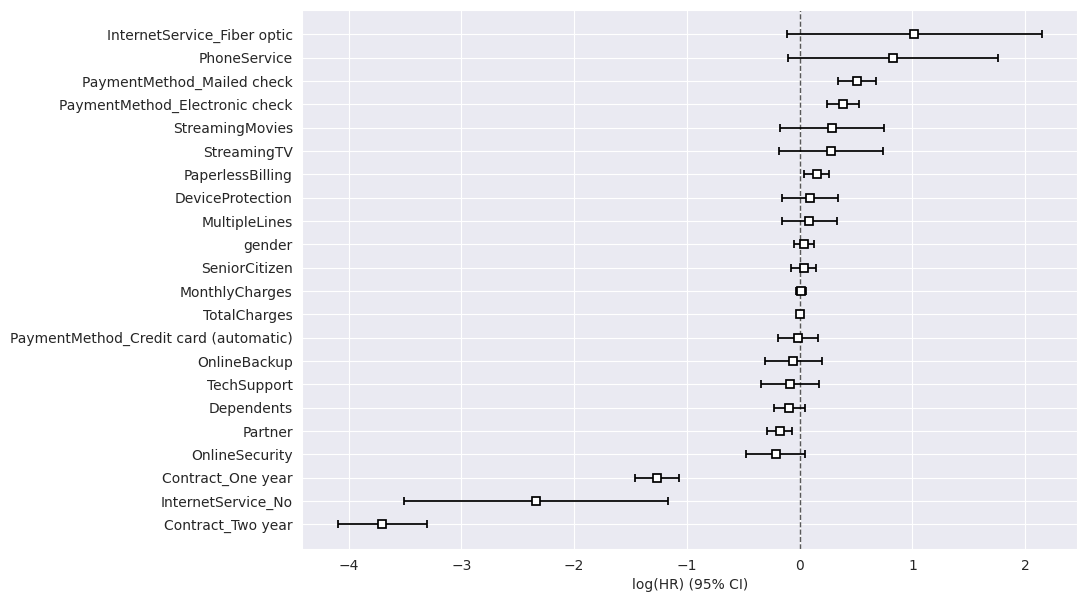

In [84]:
fig, ax = plt.subplots(figsize = (10,7))
cph.plot(ax = ax);

In [85]:
test_id = regression_df.sample(1)

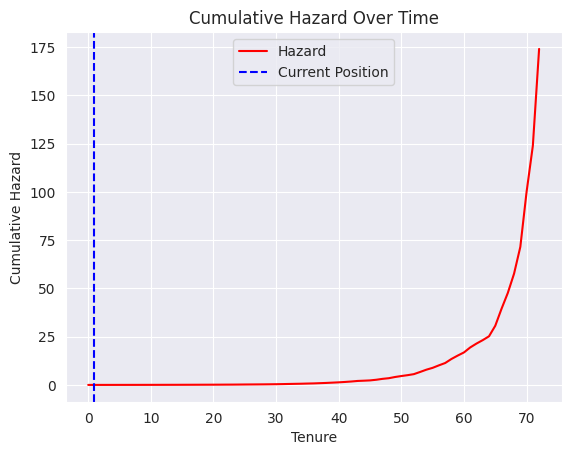

In [86]:
fig, ax = plt.subplots()
cph.predict_cumulative_hazard(test_id).plot(ax = ax, color = 'red')
plt.axvline(x=test_id.tenure.values[0], color = 'blue', linestyle='--')
plt.legend(labels=['Hazard','Current Position'])
ax.set_xlabel('Tenure', size = 10)
ax.set_ylabel('Cumulative Hazard', size = 10)
ax.set_title('Cumulative Hazard Over Time');

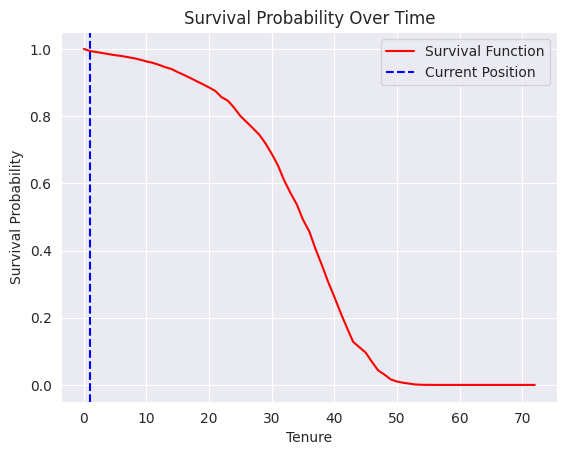

In [87]:
fig, ax = plt.subplots()
cph.predict_survival_function(test_id).plot(ax = ax, color = 'red')
plt.axvline(x=test_id.tenure.values[0], color = 'blue', linestyle='--')
plt.legend(labels=['Survival Function','Current Position'])
ax.set_xlabel('Tenure', size = 10)
ax.set_ylabel('Survival Probability', size = 10)
ax.set_title('Survival Probability Over Time');

Saving the model

In [88]:
import pickle
pickle.dump(cph, open('survivemodel.pkl','wb'))

## Customer Lifetime Value

In [89]:
def LTV(info):
    life = cph.predict_survival_function(info).reset_index()
    life.columns = ['Tenure', 'Probability']
    max_life = life.Tenure[life.Probability > 0.1].max()

    LTV = max_life * info['MonthlyCharges'].values[0]
    return LTV

In [90]:
print('LTV of a testid is:', LTV(test_id), 'dollars.')

LTV of a testid is: 873.4000000000001 dollars.


In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

#### Data Preparation based on EDA

In [92]:
def datapreparation(filepath):

    df = pd.read_csv(filepath)
    df.drop(["customerID"], inplace = True, axis = 1)

    df.TotalCharges = df.TotalCharges.replace(" ",np.nan)
    df.TotalCharges.fillna(0, inplace = True)
    df.TotalCharges = df.TotalCharges.astype(float)

    cols1 = ['Partner', 'Dependents', 'PaperlessBilling', 'Churn', 'PhoneService']
    for col in cols1:
        df[col] = df[col].apply(lambda x: 0 if x == "No" else 1)

    df.gender = df.gender.apply(lambda x: 0 if x == "Male" else 1)
    df.MultipleLines = df.MultipleLines.map({'No phone service': 0, 'No': 0, 'Yes': 1})

    cols2 = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    for col in cols2:
        df[col] = df[col].map({'No internet service': 0, 'No': 0, 'Yes': 1})

    df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)

    return df

In [93]:
df = datapreparation(filepath = "/content/Churn.csv")
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,False,False,False,False,False,True,False
1,0,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,False,False,True,False,False,False,True
2,0,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,False,False,False,False,False,False,True
3,0,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,False,False,True,False,False,False,False
4,1,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,True,False,False,False,False,True,False


In [94]:
df.isnull().any().any()

False

## Model Building

In [95]:
!pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 2.5 MB/s eta 0:00:00


In [96]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

In [97]:
train, test = train_test_split(df, test_size=0.2, random_state=111, stratify = df.Churn)

In [98]:
x = df.columns[df.columns!="Churn"]
y = "Churn"
train_x = train[x]
train_y = train[y]
test_x = test[x]
test_y = test[y]

In [99]:

def churn_prediction(algo, training_x, training_y, testing_x, testing_y, cols, cf = 'coefficients'):
    algo.fit(training_x,training_y)
    predictions = algo.predict(testing_x)
    probabilities = algo.predict_proba(testing_x)[:,1]


    if cf == "coefficients":
        coefficients = pd.DataFrame(algo.coef_.ravel())
    elif cf == "features":
        coefficients = pd.DataFrame(algo.feature_importances_)

    column_df = pd.DataFrame(cols)
    coef_sumry = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry = coef_sumry.sort_values(by = "coefficients",ascending = False)

    print (algo)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))

    conf_matrix = confusion_matrix(testing_y,predictions)
    plt.figure(figsize=(12,12))
    plt.subplot(221)
    sns.heatmap(conf_matrix, fmt = "d",annot=True, cmap='Blues')
    plt.title('Confuion Matrix')
    plt.ylabel('True Values')
    plt.xlabel('Predicted Values')

    model_roc_auc = roc_auc_score(testing_y,probabilities)
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities)

    plt.subplot(222)
    plt.plot(fpr, tpr, color='darkorange', lw=1, label = "Auc : %.3f" %model_roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")

    plt.subplot(212)
    sns.barplot(x = coef_sumry["features"] ,y = coef_sumry["coefficients"])
    plt.title('Feature Importances')
    plt.xticks(rotation="vertical")

    plt.show()

### Hyperparameters Tuning

#### Grid 1: Selecting class weight and estimators

In [100]:
param_grid1 = {'max_features':['auto', 'sqrt', 'log2', None],
          'n_estimators':[300, 500, 700, 900, 1100, 1300]
         }

rf_model = RandomForestClassifier()
grid1 = GridSearchCV(estimator=rf_model, param_grid=param_grid1, n_jobs=-1, cv=3, verbose=1, scoring = 'f1')
grid1.fit(train_x, train_y)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': ['auto', 'sqrt', 'log2', None],
                         'n_estimators': [300, 500, 700, 900, 1100, 1300]},
             scoring='f1', verbose=1)

In [101]:
grid1.best_estimator_

RandomForestClassifier(max_features='auto', n_estimators=1100)

<Axes: xlabel='param_max_features', ylabel='param_n_estimators'>

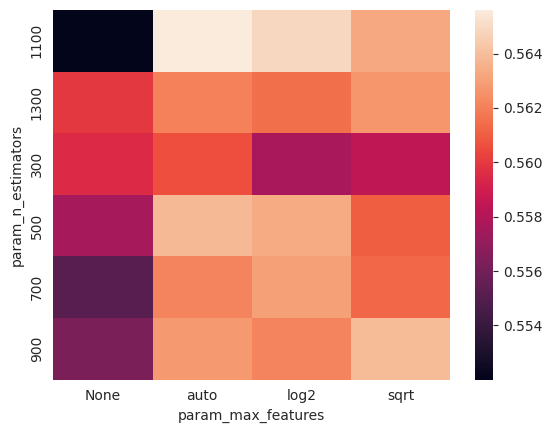

In [102]:
dt = pd.DataFrame(grid1.cv_results_)
dt.param_max_features = dt.param_max_features.astype(str)
dt.param_n_estimators = dt.param_n_estimators.astype(str)

table = pd.pivot_table(dt, values='mean_test_score', index='param_n_estimators',
                       columns='param_max_features')

sns.heatmap(table)

In [103]:
grid1.best_score_

0.5656045134429587

#### Grid 2: Selecting max depth and split criterion

In [104]:
param_grid2 = {'max_features':['auto'],
          'n_estimators':[1000, 1100, 1200],
           'criterion': ['entropy', 'gini'],
          'max_depth': [7, 9, 11, 13, 15, None],
         }

rf_model = RandomForestClassifier()
grid2 = GridSearchCV(estimator=rf_model, param_grid=param_grid2, n_jobs=-1, cv=3, verbose=1, scoring = 'f1')
grid2.fit(train_x, train_y)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [7, 9, 11, 13, 15, None],
                         'max_features': ['auto'],
                         'n_estimators': [1000, 1100, 1200]},
             scoring='f1', verbose=1)

In [105]:
grid2.best_estimator_

RandomForestClassifier(max_depth=9, max_features='auto', n_estimators=1200)

<Axes: xlabel='param_criterion', ylabel='param_max_depth'>

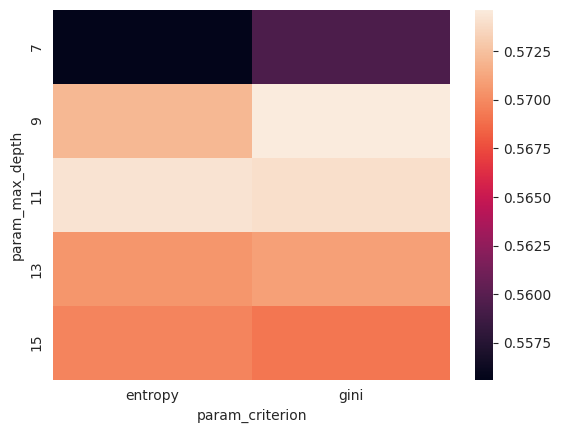

In [106]:
dt = pd.DataFrame(grid2.cv_results_)

table = pd.pivot_table(dt, values='mean_test_score', index='param_max_depth',
                       columns='param_criterion')

sns.heatmap(table)

<Axes: xlabel='param_n_estimators', ylabel='param_max_depth'>

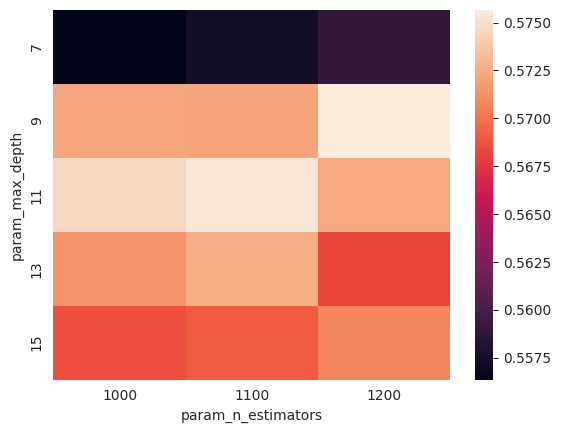

In [107]:
table = pd.pivot_table(dt, values='mean_test_score', index='param_max_depth',
                       columns='param_n_estimators')

sns.heatmap(table)

In [108]:
grid2.best_score_

0.5764688881616739

Checking if other depth and estimator value results better

In [109]:
param_grid2_2 = {'max_features':['auto'],
          'n_estimators':[950, 1000, 1050],
           'criterion': ['entropy'],
          'max_depth': [10, 11, 12],
         }

rf_model = RandomForestClassifier()
grid2_2 = GridSearchCV(estimator=rf_model, param_grid=param_grid2_2, n_jobs=-1, cv=3, verbose=1, scoring = 'f1')
grid2_2.fit(train_x, train_y)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [10, 11, 12],
                         'max_features': ['auto'],
                         'n_estimators': [950, 1000, 1050]},
             scoring='f1', verbose=1)

In [110]:
grid2_2.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=11, max_features='auto',
                       n_estimators=1000)

In [111]:
grid2_2.best_score_

0.5765145662123011

#### Grid 3: Selecting minimum samples leaf and split

In [112]:
param_grid3 = {'max_features':['auto'],
          'n_estimators':[1000],
           'criterion': ['entropy'],
          'max_depth': [10],
          'min_samples_leaf': [1, 3, 5, 7],
          'min_samples_split': [2, 4, 6, 8]
         }

rf_model = RandomForestClassifier()
grid3 = GridSearchCV(estimator=rf_model, param_grid=param_grid3, n_jobs=-1, cv=3, verbose=1, scoring = 'f1')
grid3.fit(train_x, train_y)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [10],
                         'max_features': ['auto'],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [1000]},
             scoring='f1', verbose=1)

In [113]:
grid3.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='auto',
                       min_samples_leaf=3, n_estimators=1000)

<Axes: xlabel='param_min_samples_split', ylabel='param_min_samples_leaf'>

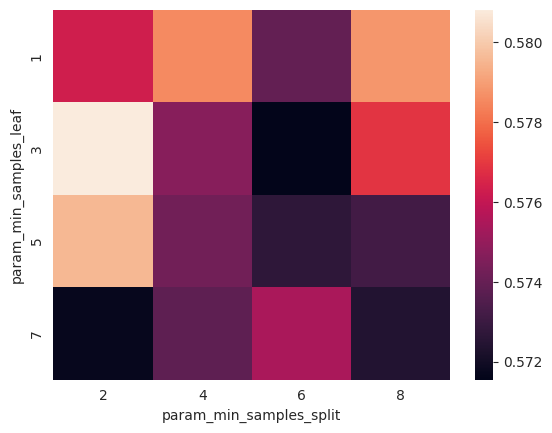

In [114]:
dt = pd.DataFrame(grid3.cv_results_)

table = pd.pivot_table(dt, values='mean_test_score', index='param_min_samples_leaf',
                       columns='param_min_samples_split')

sns.heatmap(table)

In [115]:
grid3.best_score_

0.5808099563268015

#### Grid 4: Selecting class weight

In [116]:
param_grid4 = {'class_weight':[{0:1, 1:1}, {0:1, 1:2}, {0:1, 1:3}],
            'max_features':['auto'],
          'n_estimators':[1000],
           'criterion': ['entropy'],
          'max_depth': [10],
          'min_samples_leaf': [1],
          'min_samples_split': [8]
         }

rf_model = RandomForestClassifier()
grid4 = GridSearchCV(estimator=rf_model, param_grid=param_grid4, n_jobs=-1, cv=3, verbose=1, scoring = 'f1')
grid4.fit(train_x, train_y)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}],
                         'criterion': ['entropy'], 'max_depth': [10],
                         'max_features': ['auto'], 'min_samples_leaf': [1],
                         'min_samples_split': [8], 'n_estimators': [1000]},
             scoring='f1', verbose=1)

In [117]:
grid4.best_estimator_

RandomForestClassifier(class_weight={0: 1, 1: 3}, criterion='entropy',
                       max_depth=10, max_features='auto', min_samples_split=8,
                       n_estimators=1000)

<Axes: ylabel='param_class_weight'>

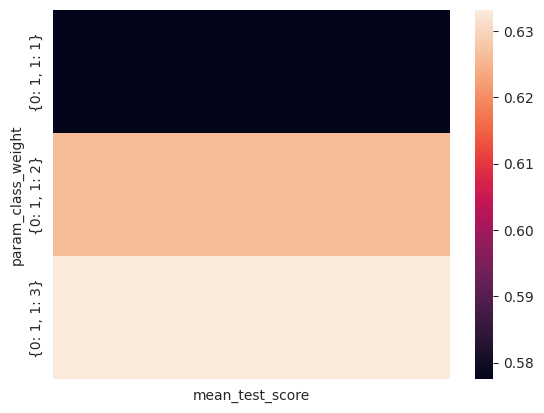

In [118]:
dt = pd.DataFrame(grid4.cv_results_)
dt.param_class_weight = dt.param_class_weight.astype(str)
table = pd.pivot_table(dt, values='mean_test_score', index='param_class_weight')

sns.heatmap(table)

In [119]:
grid4.best_score_

0.6332052857505834

### Final Model

In [120]:
model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={0: 1, 1: 2},
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(class_weight={0: 1, 1: 2}, criterion='entropy',
                       max_depth=10, max_features='auto', min_samples_split=8,
                       n_estimators=1000)

 Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      1035
           1       0.59      0.66      0.62       374

    accuracy                           0.79      1409
   macro avg       0.73      0.75      0.74      1409
weighted avg       0.80      0.79      0.79      1409

Accuracy   Score :  0.7877927608232789
Area under curve :  0.8482988452297915 



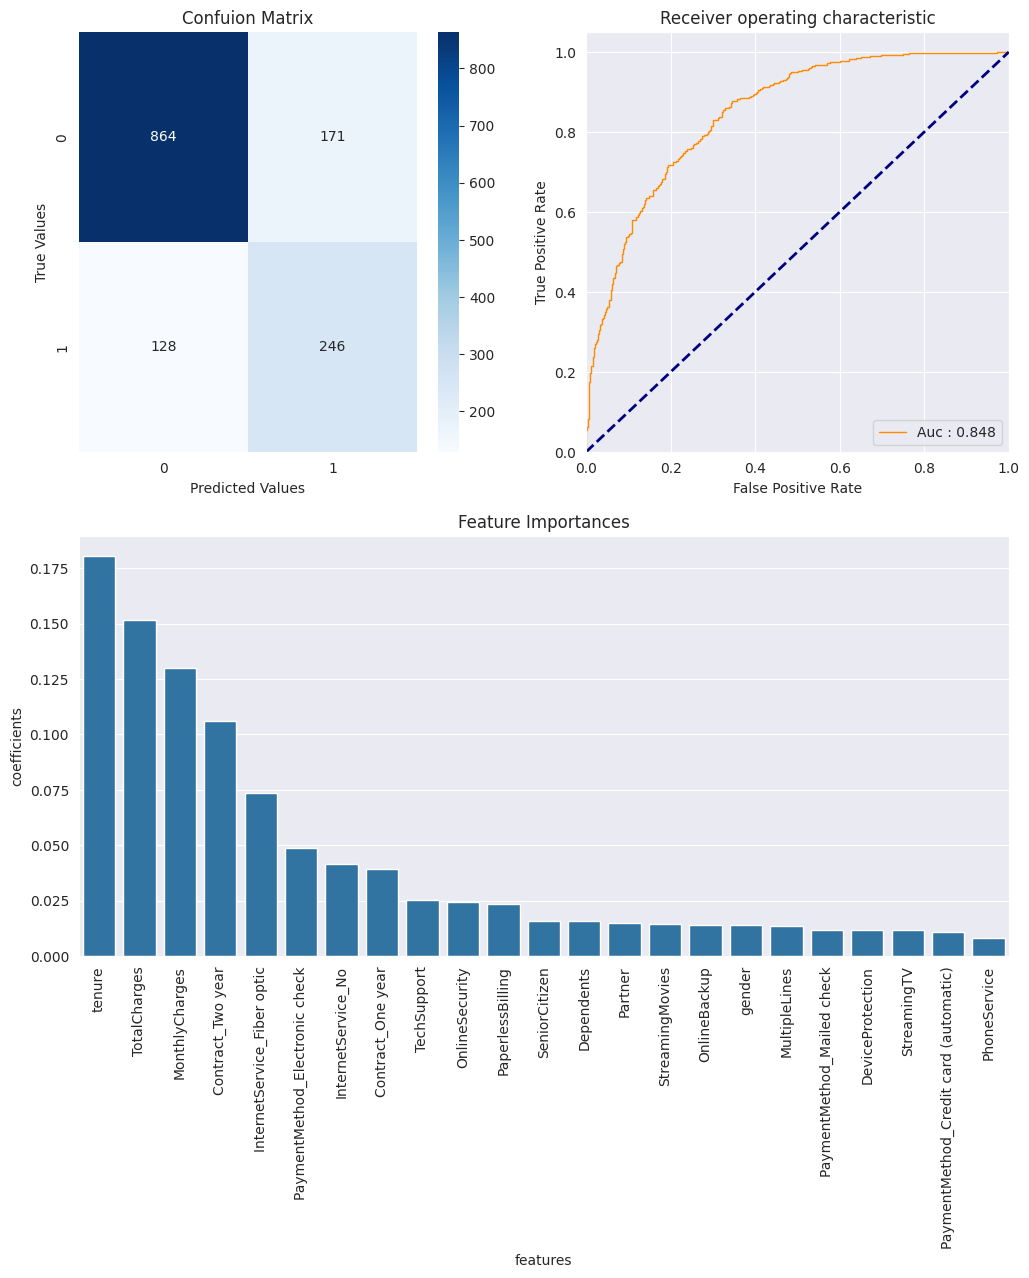

In [121]:
churn_prediction(model, train_x, train_y, test_x, test_y, x,"features")

Checking the model's performance on train data itself

In [122]:
train_scores = cross_val_score(model, train_x, train_y, cv = 5, scoring='f1')
train_scores

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

array([0.60829493, 0.6752    , 0.62222222, 0.58978583, 0.63836478])

In [123]:
np.mean(train_scores)

0.6267735529864946

In [124]:


print(train_x.shape)
print(test_x.shape)

(5634, 23)
(1409, 23)


As we can see that the performance of the model on test data is same as training data. So, we can conclude that there is no overfitting and underfitting.

#### Saving model

In [125]:
import pickle
pickle.dump(model, open('model.pkl','wb'))

In [126]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 4.2 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=9658f5d322d26ce4f60784f2ebfa626f0fd75972ac3178cf23c178c3085cb9f2
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [127]:
!pip install pdpbox

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 57.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 85.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.0/120.0 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.7/92.7 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.0/93.0 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

## Explaining the model

In [128]:
import eli5
from eli5.sklearn import PermutationImportance

from pdpbox import pdp, info_plots

In [129]:
perm = PermutationImportance(model, random_state=1).fit(test_x, test_y)
eli5.show_weights(perm, feature_names = test_x.columns.tolist())

Weight,Feature
0.0183 ± 0.0067,InternetService_Fiber optic
0.0055 ± 0.0099,Contract_Two year
0.0053 ± 0.0132,Contract_One year
0.0050 ± 0.0065,InternetService_No
0.0041 ± 0.0056,PaymentMethod_Electronic check
0.0035 ± 0.0055,OnlineSecurity
0.0026 ± 0.0085,PaperlessBilling
0.0021 ± 0.0079,MonthlyCharges
0.0021 ± 0.0100,tenure
0.0013 ± 0.0017,OnlineBackup


In [130]:
import pdpbox
print(pdpbox.__version__)

0.3.0


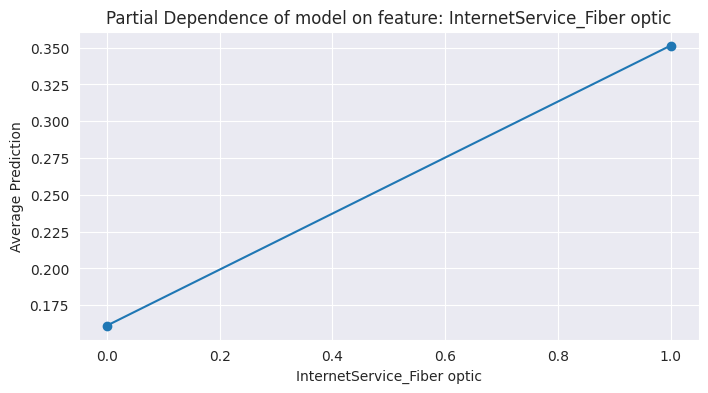

In [131]:
import numpy as np
import matplotlib.pyplot as plt


test_x_clone = test_x.copy()

values = [0, 1]
averages = []

for val in values:
    test_x_clone['InternetService_Fiber optic'] = val
    preds = model.predict(test_x_clone)
    averages.append(np.mean(preds))

plt.figure(figsize=(8, 4))
plt.plot(values, averages, marker='o')
plt.title('Partial Dependence of model on feature: InternetService_Fiber optic')
plt.xlabel('InternetService_Fiber optic')
plt.ylabel('Average Prediction')
plt.grid(True)
plt.show()



#### Payment Method: Mailed Check

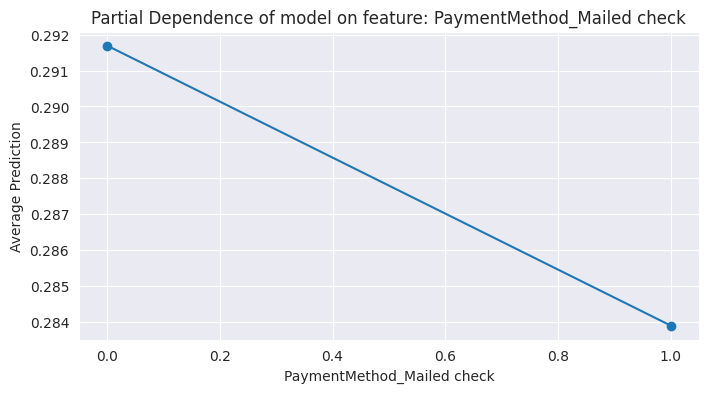

In [132]:

test_x_clone = test_x.copy()

values = [0, 1]
averages = []

for val in values:
    test_x_clone['PaymentMethod_Mailed check'] = val
    preds = model.predict(test_x_clone)
    averages.append(np.mean(preds))

plt.figure(figsize=(8, 4))
plt.plot(values, averages, marker='o')
plt.title('Partial Dependence of model on feature: PaymentMethod_Mailed check')
plt.xlabel('PaymentMethod_Mailed check')
plt.ylabel('Average Prediction')
plt.grid(True)
plt.show()


#### Monthly Charges

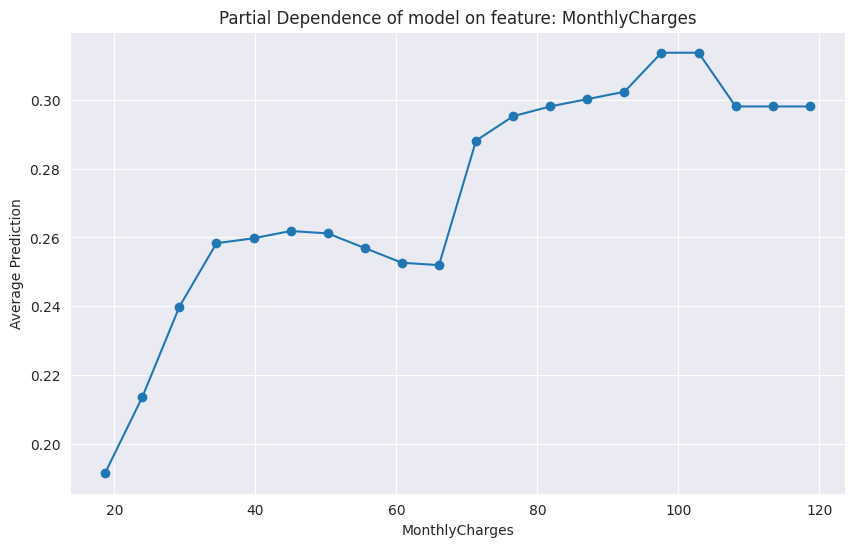

In [133]:

test_x_clone = test_x.copy()

values = np.linspace(test_x['MonthlyCharges'].min(), test_x['MonthlyCharges'].max(), 20)
averages = []

for val in values:
    test_x_clone['MonthlyCharges'] = val
    preds = model.predict(test_x_clone)
    averages.append(np.mean(preds))


plt.figure(figsize=(10, 6))
plt.plot(values, averages, marker='o')
plt.title('Partial Dependence of model on feature: MonthlyCharges')
plt.xlabel('MonthlyCharges')
plt.ylabel('Average Prediction')
plt.grid(True)
plt.show()


#### Total Charges

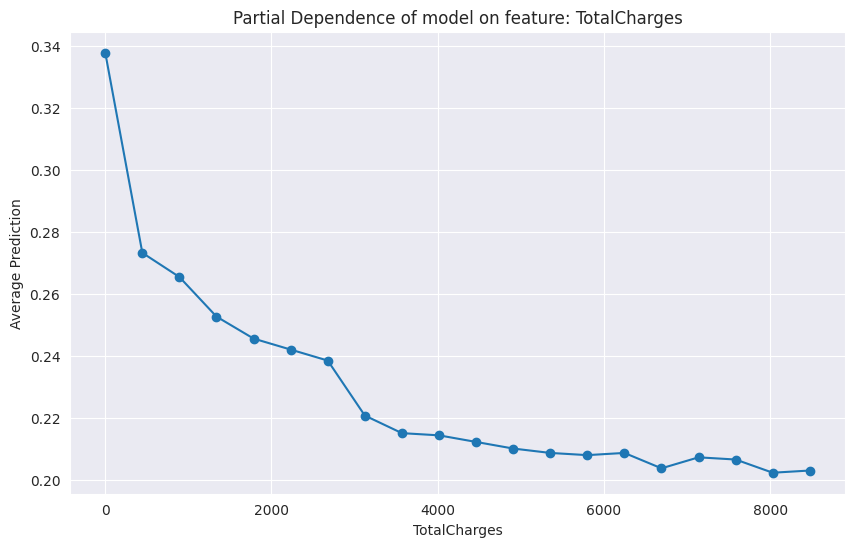

In [134]:
import numpy as np
import matplotlib.pyplot as plt

test_x_clone = test_x.copy()

values = np.linspace(test_x['TotalCharges'].min(), test_x['TotalCharges'].max(), 20)
averages = []

for val in values:
    test_x_clone['TotalCharges'] = val
    preds = model.predict(test_x_clone)
    averages.append(np.mean(preds))

plt.figure(figsize=(10, 6))
plt.plot(values, averages, marker='o')
plt.title('Partial Dependence of model on feature: TotalCharges')
plt.xlabel('TotalCharges')
plt.ylabel('Average Prediction')
plt.grid(True)
plt.show()


#### Contract - Two years

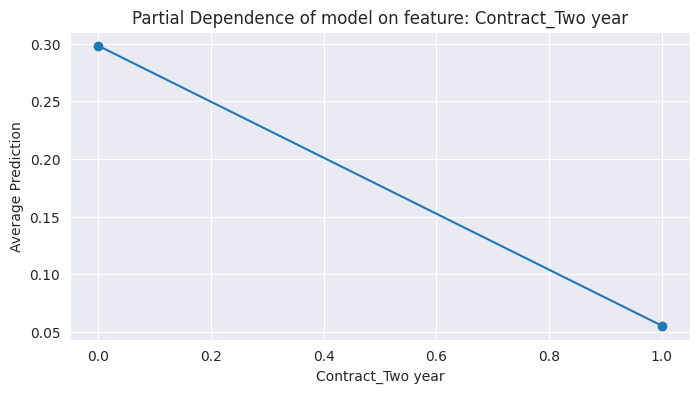

In [135]:
import numpy as np
import matplotlib.pyplot as plt


test_x_clone = test_x.copy()

values = [0, 1]
averages = []

for val in values:
    test_x_clone['Contract_Two year'] = val
    preds = model.predict(test_x_clone)
    averages.append(np.mean(preds))

plt.figure(figsize=(8, 4))
plt.plot(values, averages, marker='o')
plt.title('Partial Dependence of model on feature: Contract_Two year')
plt.xlabel('Contract_Two year')
plt.ylabel('Average Prediction')
plt.grid(True)
plt.show()


#### Tenure

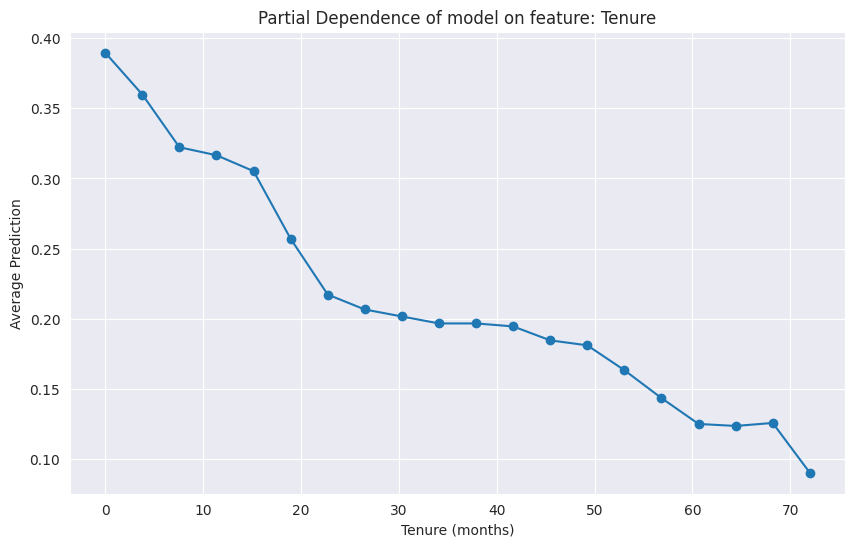

In [136]:
import numpy as np
import matplotlib.pyplot as plt


test_x_clone = test_x.copy()

values = np.linspace(test_x['tenure'].min(), test_x['tenure'].max(), 20)
averages = []

for val in values:
    test_x_clone['tenure'] = val
    preds = model.predict(test_x_clone)
    averages.append(np.mean(preds))


plt.figure(figsize=(10, 6))
plt.plot(values, averages, marker='o')
plt.title('Partial Dependence of model on feature: Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Average Prediction')
plt.grid(True)
plt.show()


Final Features

In [137]:
test_x.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')